In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
data  =pd.read_csv('stud.csv')

In [68]:
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [69]:
data.tail(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [70]:
df=data

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [72]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## There is no missing values

In [73]:
df.duplicated().sum()

0

### No duplicates present

In [74]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [75]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [76]:
print("catagories in 'gender'variable: ",end=" ")
print(df['gender'].unique())

print("catagories in 'race/ethnicity'variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("catagories in 'parental level of education'variable: ",end=" ")
print(df['parental level of education'].unique())

print("catagories in 'lunch'variable: ",end=" ")
print(df['lunch'].unique())

print("catagories in 'test preparation course'variable: ",end=" ")
print(df['test preparation course'].unique())



catagories in 'gender'variable:  ['female' 'male']
catagories in 'race/ethnicity'variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
catagories in 'parental level of education'variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
catagories in 'lunch'variable:  ['standard' 'free/reduced']
catagories in 'test preparation course'variable:  ['none' 'completed']


In [77]:
#defining different type of features
numerical_features = [feature for feature in df.columns if df[feature].dtype  !='O']
categorical_features =[feature for feature in df.columns if df[feature].dtype =='O']
print(numerical_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [78]:
df['Total_score']=df['math score']+df['reading score']+df['writing score']
df['Average']=df['Total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [79]:
reading_full=df[df['reading score']==100]['Average'].count()
writing_full=df[df['writing score']==100]['Average'].count()
maths_full=df[df['math score']==100]['Average'].count()

print('number of students who got full mark in reading:',reading_full)
print('number of students who got full mark in writing:',writing_full)
print('number of students who got full mark in maths: ', maths_full)



number of students who got full mark in reading: 17
number of students who got full mark in writing: 14
number of students who got full mark in maths:  7


In [80]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [81]:
reading_less_20 = df[df['reading score']<=20]['Average'].count()
writing_less_20 = df[df['writing score']<=20]['Average'].count()
math_less_20 = df[df['math score']<=20]['Average'].count()

print('number of students who got reading score less than 20: ',reading_less_20)
print('number of students who got math score less than 20: ',math_less_20)
print('number of students who got writing score less than 20:',writing_less_20)

number of students who got reading score less than 20:  1
number of students who got math score less than 20:  4
number of students who got writing score less than 20: 3


### Observation on performance
students performed worst on math 
best performance is on reading


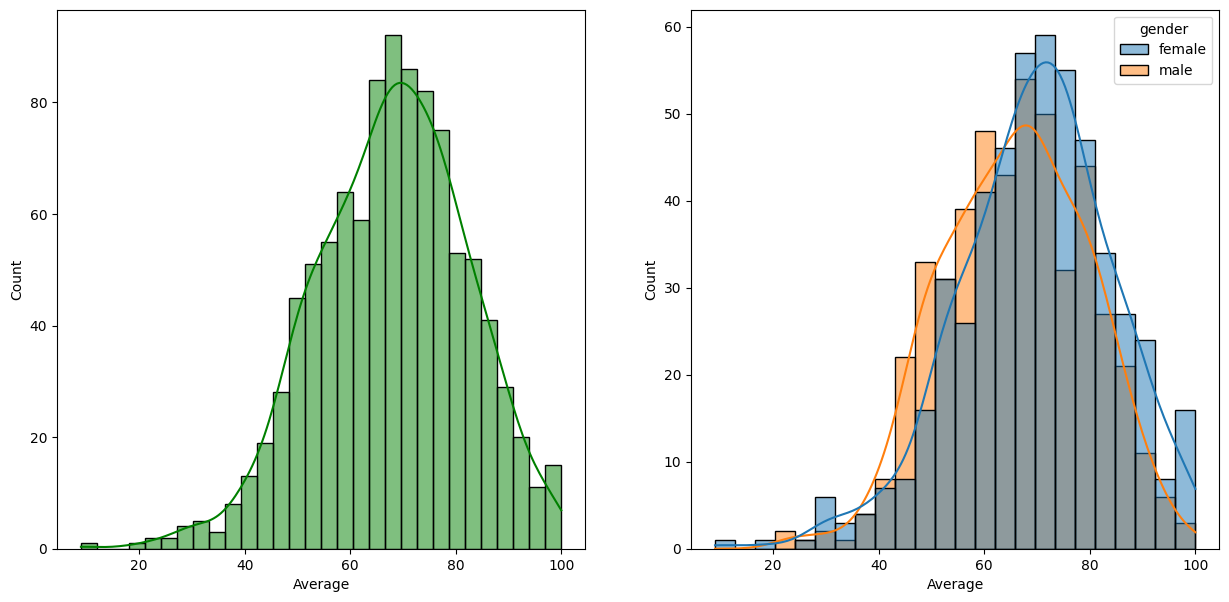

In [82]:
fig, axis = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()




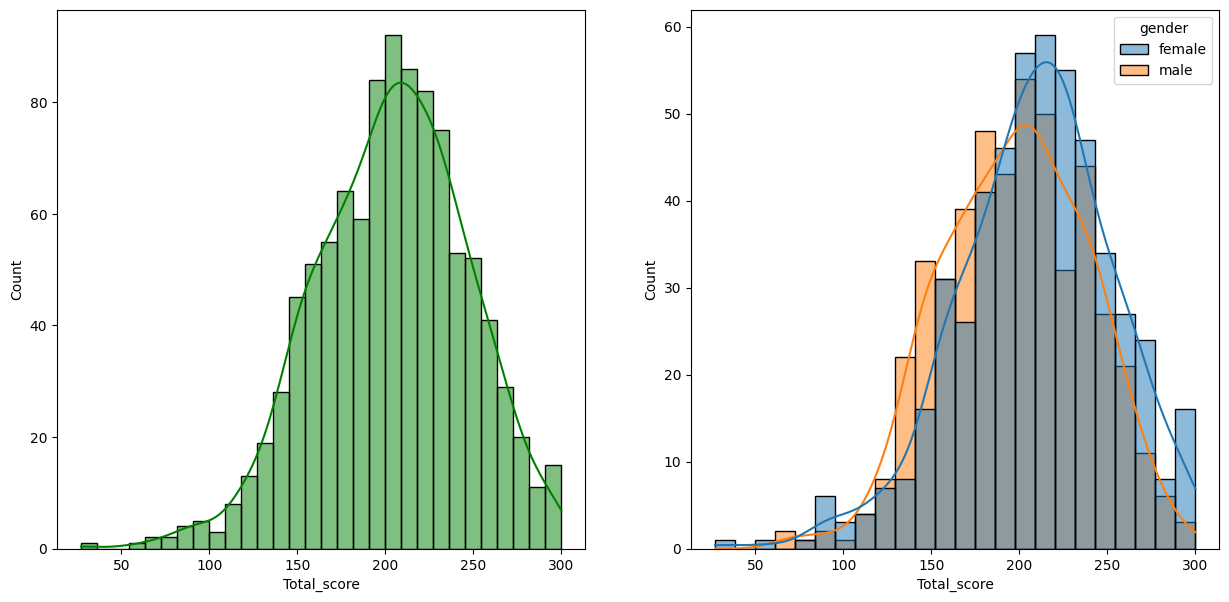

In [83]:
fig, axis = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()




### From this we can see that the female students perform better than the male students.

In [65]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Checking to see the performance of male and  female students on each subjects to see which group is better at reading writing and math

In [88]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


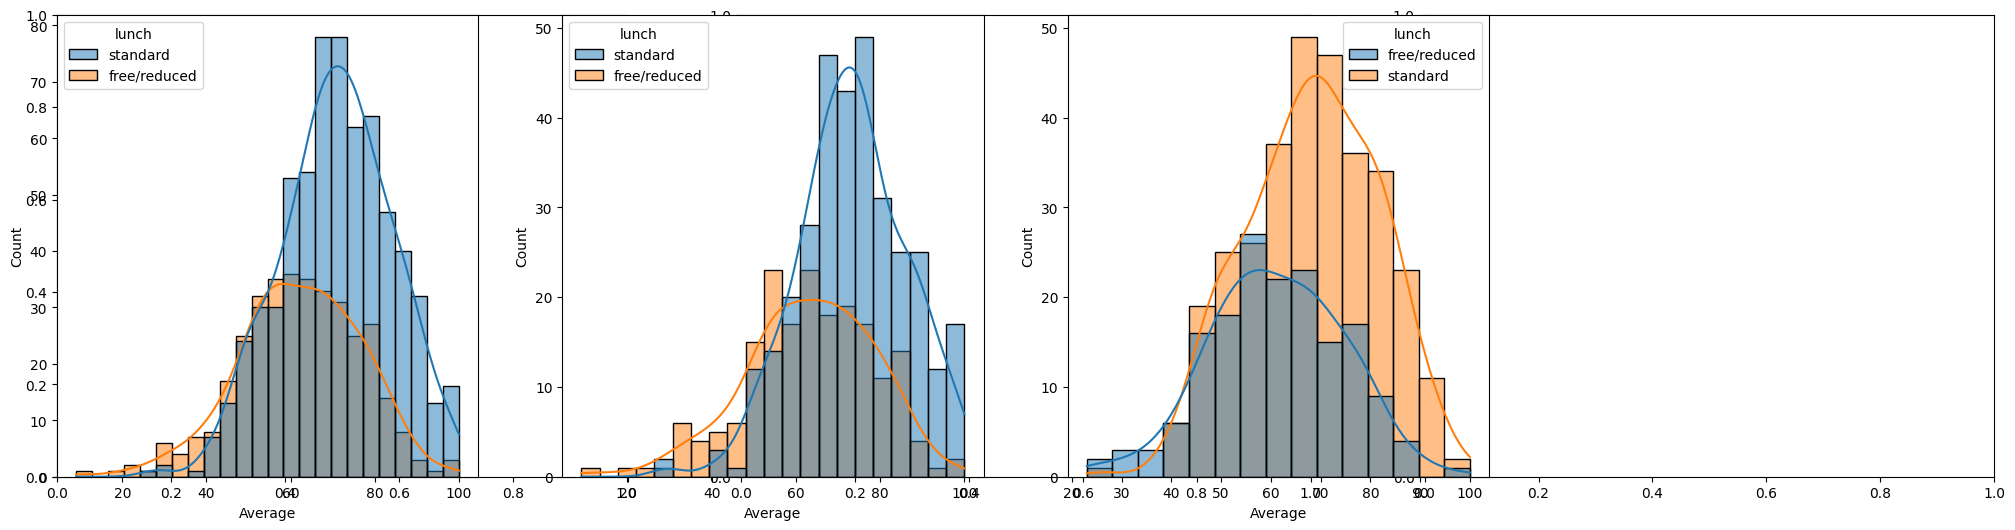

In [95]:

plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='lunch')

plt.show()

In [96]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


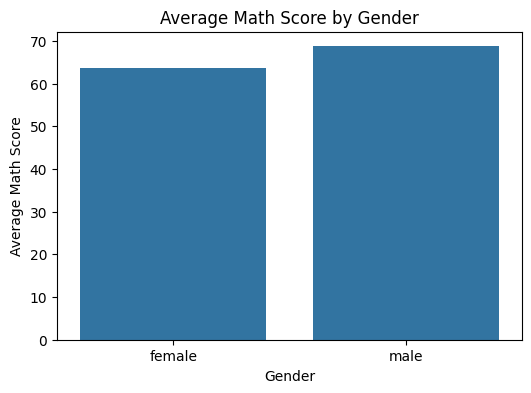

In [98]:

plt.figure(figsize=(6,4))

sns.barplot(
    data=df,
    x='gender',
    y='math score',
    estimator='mean',
    ci=None   # removes confidence interval lines
)

plt.title("Average Math Score by Gender")
plt.ylabel("Average Math Score")
plt.xlabel("Gender")

plt.show()

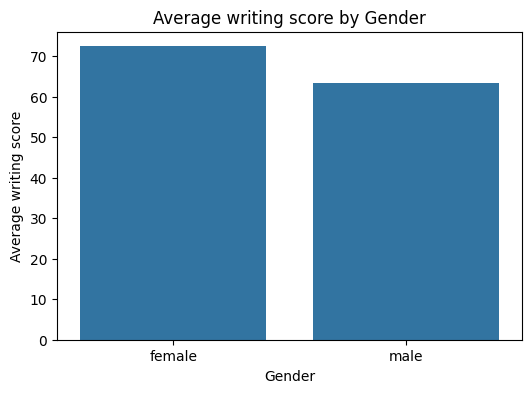

In [102]:

plt.figure(figsize=(6,4))

sns.barplot(
    data=df,
    x='gender',
    y='writing score',
    estimator='mean',
    ci=None   # removes confidence interval lines
)

plt.title("Average writing score by Gender")
plt.ylabel("Average writing score")
plt.xlabel("Gender")

plt.show()

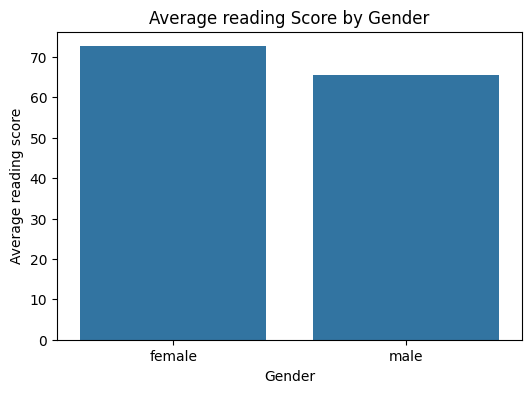

In [103]:
plt.figure(figsize=(6,4))

sns.barplot(
    data=df,
    x='gender',
    y='reading score',
    estimator='mean',
    ci=None   # removes confidence interval lines
)

plt.title("Average reading Score by Gender")
plt.ylabel("Average reading score")
plt.xlabel("Gender")

plt.show()

#### males have higher average score in math while females have the higher average when it comes to both reading and writing

In [104]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [108]:
df_parent_edu=df["parental level of education"].nunique()
print(df_parent_edu)

6


In [111]:
# List all unique parental education levels
unique_edu = df['parental level of education'].unique()
print("Parental education levels in the dataset:")
for i, level in enumerate(unique_edu, start=1):
    print(f"{i}. {level}")

Parental education levels in the dataset:
1. bachelor's degree
2. some college
3. master's degree
4. associate's degree
5. high school
6. some high school


In [112]:
# Replace "some high school" with "high school"
df['parental level of education'] = df['parental level of education'].replace("some high school", "high school")

# Check the updated unique values
unique_edu = df['parental level of education'].unique()
print("Updated parental education levels:")
for i, level in enumerate(unique_edu, start=1):
    print(f"{i}. {level}")

Updated parental education levels:
1. bachelor's degree
2. some college
3. master's degree
4. associate's degree
5. high school


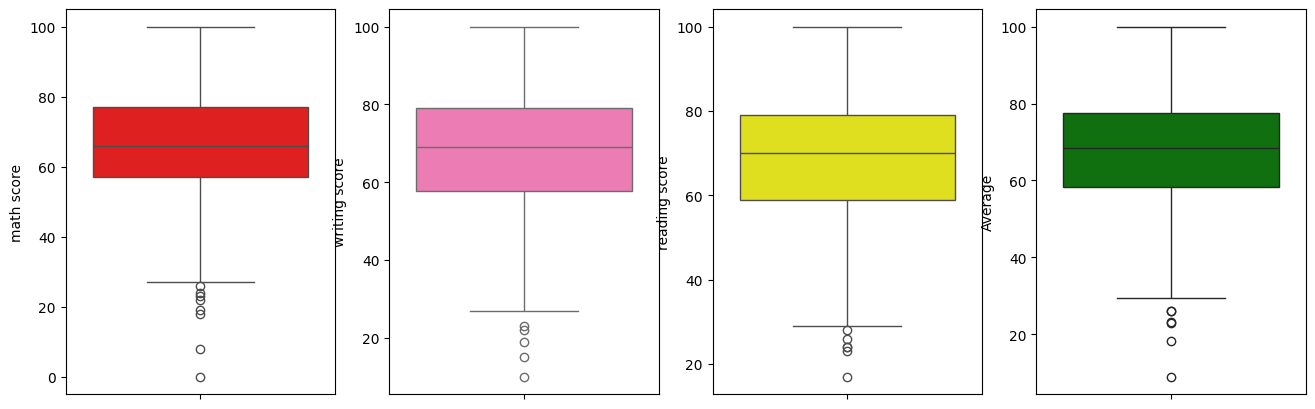

In [123]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='red')
plt.subplot(142)
sns.boxplot(df['writing score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['reading score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='green')
plt.show()

In [135]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [131]:

diff_ethnicity= df['race/ethnicity'].unique()
print("different ethnicity")
for i, level in enumerate(diff_ethnicity, start=1):
    print(f"{i}. {level}")

different ethnicity
1. group B
2. group C
3. group A
4. group D
5. group E


In [132]:
diff_lunch= df['lunch'].unique()
print("lunch")
for i, level in enumerate(diff_lunch, start=1):
    print(f"{i}. {level}")

lunch
1. standard
2. free/reduced


<Axes: xlabel='lunch', ylabel='Total_score'>

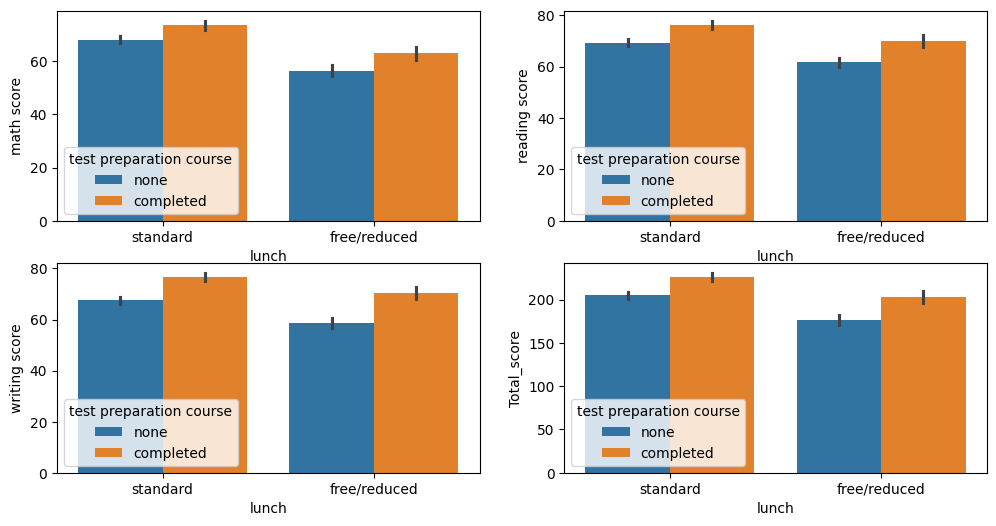

In [136]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading score'],hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing score'],hue=df['test preparation course'])
plt.subplot(2,2,4)
sns.barplot(x=df['lunch'],y=df['Total_score'],hue=df['test preparation course'])